Import numpy

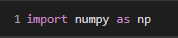

In [1]:
# TODO 1: ketikkan kode di atas pada bagian ini
import numpy as np

# Membuat Dataset

![dataset](https://miro.medium.com/max/639/1*uGmgaSPI_pv25dBugw1AZQ.png)

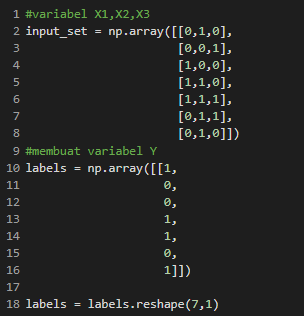

In [13]:
# TODO 2 : ketikkan kode di atas pada bagian ini
#variabel X1, X2, X3
input_set = np.array([[0,1,0],
                       [0,0,1],
                       [1,0,0],
                       [1,1,0],
                       [1,1,1],
                       [0,1,1],
                       [0,1,0]])

#membuat variabel Y
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(7,1)


Generate secara random nilai dari bobot dan bias

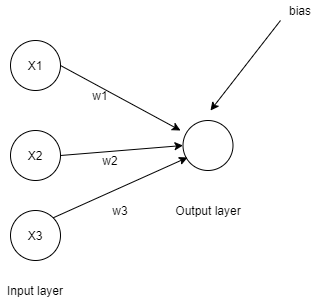



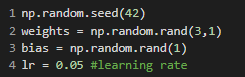

In [3]:
# TODO 3: ketikkan kode di atas pada bagian ini
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05 #learning rate





In [4]:
weights

array([[0.37454012],
       [0.95071431],
       [0.73199394]])

In [5]:
bias

array([0.59865848])

# Fungsi Aktivasi

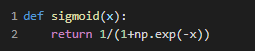

In [6]:
# TODO 4: ketikkan kode di atas pada bagian ini
def sigmoid(x):
  return 1/(1+np.exp(-x))




# Menghitung turunan fungsi sigmoid

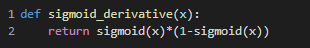

In [7]:
# TODO 5: ketikkan kode di atas pada bagian ini
def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))




# Langkah-langkah training ANN

Penjelasan per step dari tahap-tahap training ANN

## Feedforward

1. Feed input ke model

In [14]:
inputs = input_set
print(inputs)

[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 1]
 [0 1 0]]


2. Menghitung dot product antara input_set dan bobot

In [15]:
XW = np.dot(inputs, weights)+ bias
print(XW)

[[1.54937279]
 [1.33065243]
 [0.9731986 ]
 [1.92391291]
 [2.65590685]
 [2.28136673]
 [1.54937279]]


3. Menggunakan fungsi aktivasi (sigmoid)

Sigmoid function :
![sigmoid](https://miro.medium.com/max/271/0*Z971d29-r-SS59Z-.png)

In [16]:
z = sigmoid(XW)
print(z)

[[0.82482312]
 [0.79094853]
 [0.72575659]
 [0.87257414]
 [0.93437412]
 [0.90732204]
 [0.82482312]]


## Backpropagation

1. Evaluasi dengan menghitung loss function

![MSE](https://miro.medium.com/max/581/0*DGjzN-ppsTBxYsFp.png)

In [17]:
error = z - labels
print(error)


[[-0.17517688]
 [ 0.79094853]
 [ 0.72575659]
 [-0.12742586]
 [-0.06562588]
 [ 0.90732204]
 [-0.17517688]]


In [18]:
print(error.sum())

1.8806216715619812


2. Update bobot dengan gradient descent

![gsd](https://miro.medium.com/max/414/0*RpdL_oGbesW7sQhF.png)

In [19]:
dcost = error
dpred = sigmoid_derivative(z)
z_del = dcost * dpred
inputs = input_set.T
weights = weights-lr*np.dot(inputs, z_del)

In [20]:
# Nilai bobot baru 
print(weights)

[[0.36855399]
 [0.94712073]
 [0.71487592]]


3. Update nilai bias

In [21]:
for num in z_del:
        bias = bias - lr*num

# Nilai bias baru
print(bias)

[0.57860143]


#Training ANN dengan epoch = 25000

Training ANN dengan Feedforward dan Backpropagation

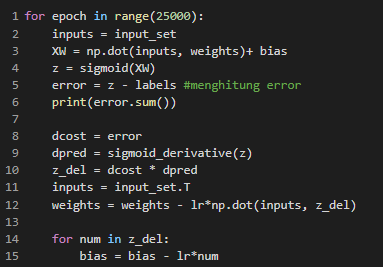

In [23]:
# TODO 6: ketikkan kode di atas pada bagian ini
for epoch in range (25000):
  inputs = input_set
  XW = np.dot(inputs, weights) + bias
  z = sigmoid (XW)
  error = z - labels #menghitung error
  print(error.sum())

  dcost = error
  dpred = sigmoid_derivative(z)
  z_del = dcost * dpred
  inputs = input_set.T 
  weights = weights - lr*np.dot(inputs, z_del)

  for num in z_del:
    bias = bias - lr*num




Streaming output truncated to the last 5000 lines.
-0.0030708909929968997
-0.0030708016352405526
-0.003070712280175601
-0.003070622927802698
-0.003070533578121905
-0.0030704442311346447
-0.003070354886841792
-0.0030702655452419583
-0.003070176206336539
-0.003070086870126533
-0.003069997536611885
-0.0030699082057933785
-0.0030698188776709517
-0.0030697295522453677
-0.003069640229517473
-0.0030695509094869552
-0.0030694615921545293
-0.0030693722775216314
-0.0030692829655876164
-0.0030691936563536013
-0.003069104349818691
-0.003069015045984863
-0.0030689257448525825
-0.003068836446421766
-0.0030687471506930103
-0.003068657857666461
-0.0030685685673425417
-0.0030684792797230215
-0.0030683899948070817
-0.0030683007125954023
-0.003068211433088386
-0.003068122156287219
-0.0030680328821917763
-0.0030679436108024885
-0.0030678543421207363
-0.003067765076145354
-0.003067675812877431
-0.0030675865523180565
-0.0030674972944673
-0.0030674080393251132
-0.003067318786893092
-0.003067229537170972
-0.0

# Membuat Prediksi dari model yang telah dilatih

Data dengan fitur : X1 = 1, X2 = 0, X3 = 0

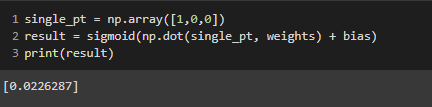

In [24]:
# TODO 7: ketikkan kode di atas pada bagian ini
single_pt = np.array([1,0,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)



[0.0226287]


Data dengan fitur : X1 = 0, X2 = 1, X3 = 0

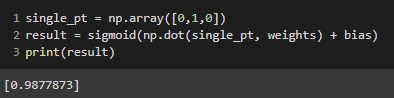

In [25]:
# TODO 8: ketikkan kode di atas pada bagian ini
single_pt = np.array([0,1,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)




[0.9877873]
